In [1]:
import cv2
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy.ndimage import rotate, shift

In [2]:
def process_image(file_path):
    # Load the image in grayscale
    image = cv2.imread(file_path, 0)
    # Threshold the image to get a binary image
    _, binary_image = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY)
    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Get the largest contour which should be the shape
    contour = max(contours, key=cv2.contourArea)
    return contour, binary_image

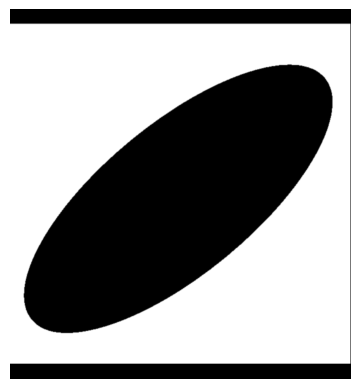

In [3]:
# Paths of the images
file_paths = glob.glob('*.png')

# Process all images and find contours
processed_images = [process_image(file_path) for file_path in file_paths]

# Calculate the moments to find the centroid
moments = [cv2.moments(contour) for contour, _ in processed_images]

# Normalize the shapes based on centroid and area
normalized_shapes = []
for (contour, binary_image), moment in zip(processed_images, moments):
    if moment['m00'] == 0:
        continue  # Skip if the area is zero
    cx = int(moment['m10'] / moment['m00'])
    cy = int(moment['m01'] / moment['m00'])

    # Shift the image to move the centroid to the center
    rows, cols = binary_image.shape
    shift_x = cols//2 - cx
    shift_y = rows//2 - cy
    shifted_image = shift(binary_image, shift=[shift_y, shift_x])

    # Calculate the angle of the shape
    angle = cv2.minAreaRect(contour)[-1]
    # Normalize the rotation
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    # Rotate the image
    rotated = rotate(shifted_image, angle, reshape=False, prefilter=False)

    # Shift back the image to its original position
    rotated_back = shift(rotated, shift=[-shift_y, -shift_x])
    normalized_shapes.append(rotated_back)

# Combine all the shapes to find the common shape
# Since we're working with binary images, a direct mean might not be meaningful.
# You might want to consider a different approach for combining shapes.

# Show the resulting common shape
# Adjust this part based on how you decide to combine the shapes.
plt.imshow(normalized_shapes[0], cmap='gray')  # Example to show the first normalized shape
plt.axis('off')
plt.show()